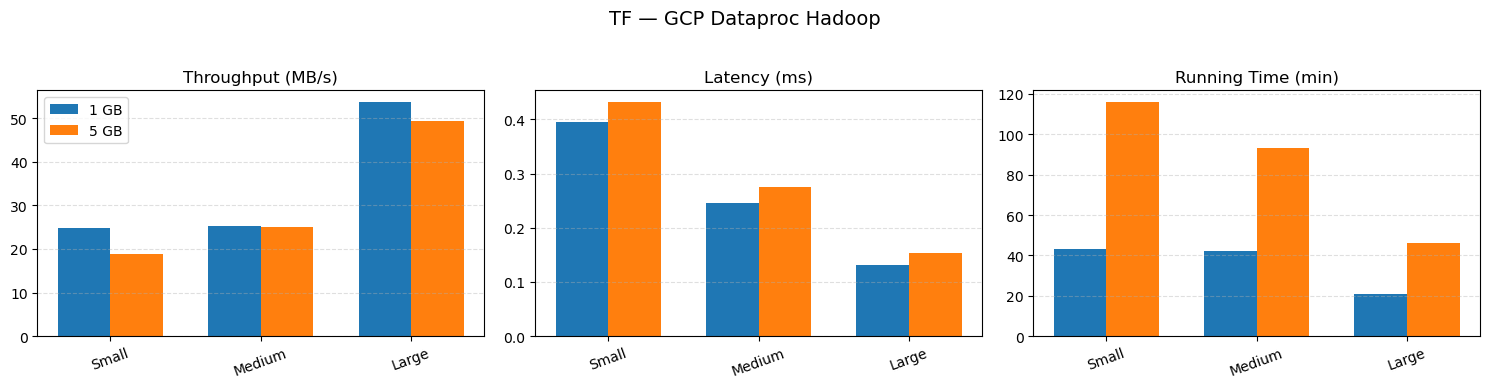

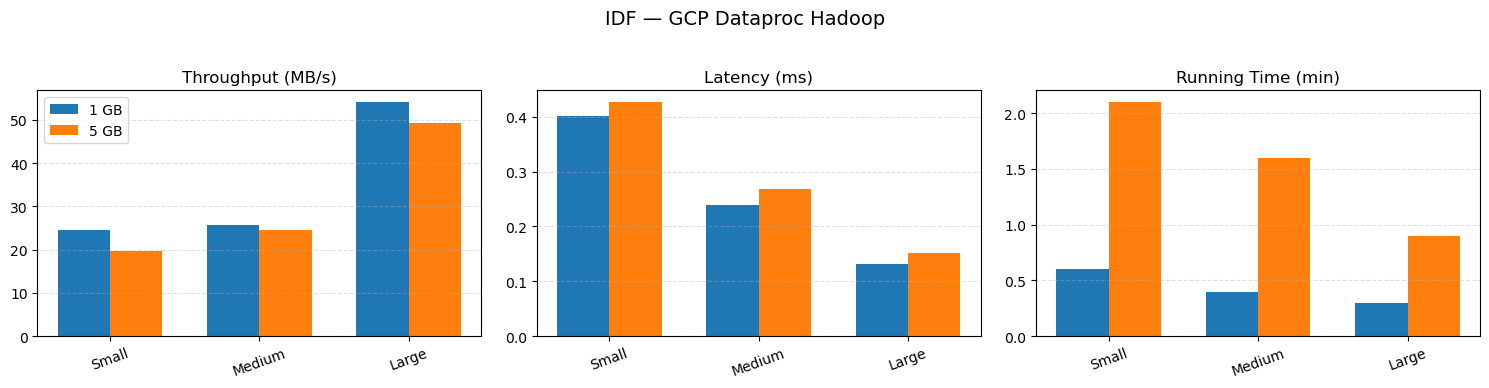

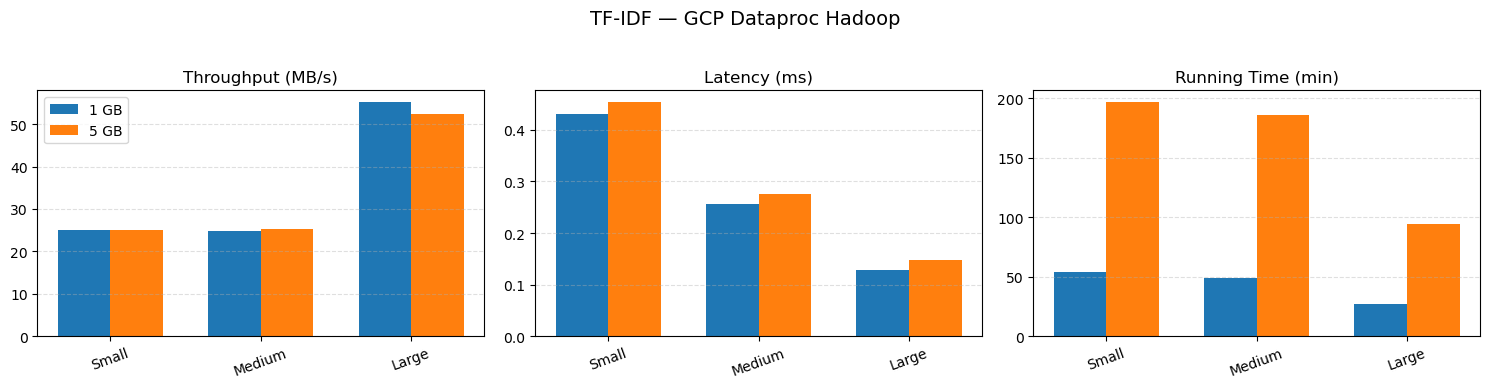

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# ================================
# Data from AWS-based estimations
# Mapped to GCP Configs:
#   Config A -> Small (4 vCPUs)
#   Config B -> Medium (8 vCPUs)
#   Config C -> Large (16 vCPUs)
# ================================

configs = ["Small", "Medium", "Large"]

# Metrics structure:
# job -> metric -> GB-size -> list over configs [A, B, C]

data = {
    "TF": {
        "Throughput (MB/s)": {
            "1GB": [24.9, 25.2, 53.7],
            "5GB": [18.8, 25.1, 49.3],
        },
        "Latency (ms)": {
            "1GB": [0.396, 0.246, 0.131],
            "5GB": [0.432, 0.276, 0.153],
        },
        "Running Time (min)": {
            "1GB": [43, 42, 21],
            "5GB": [116, 93, 46],
        },
    },
    "IDF": {
        "Throughput (MB/s)": {
            "1GB": [24.5, 25.6, 54.1],
            "5GB": [19.7, 24.6, 49.2],
        },
        "Latency (ms)": {
            "1GB": [0.401, 0.239, 0.132],
            "5GB": [0.427, 0.269, 0.151],
        },
        "Running Time (min)": {
            "1GB": [0.6, 0.4, 0.3],
            "5GB": [2.1, 1.6, 0.9],
        },
    },
    "TF-IDF": {
        "Throughput (MB/s)": {
            "1GB": [25.1, 24.9, 55.2],
            "5GB": [25.0, 25.2, 52.4],
        },
        "Latency (ms)": {
            "1GB": [0.430, 0.257, 0.128],
            "5GB": [0.454, 0.275, 0.147],
        },
        "Running Time (min)": {
            "1GB": [54, 49, 27],
            "5GB": [197, 186, 94],
        },
    },
}

def plot_job(job_name, job_data):
    """
    Make one figure for a given job (TF / IDF / TF-IDF)
    with 3 subplots:
      - Throughput
      - Latency
      - Running Time
    X-axis: Config A/B/C
    Bars: 1GB vs 5GB
    """
    metrics = list(job_data.keys())  # e.g. ["Throughput (MB/s)", "Latency (ms)", "Running Time (min)"]

    x = np.arange(len(configs))  # positions for configs
    bar_width = 0.35

    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)
    fig.suptitle(f"{job_name} — GCP Dataproc Hadoop", fontsize=14)

    for ax, metric in zip(axes, metrics):
        vals_1gb = job_data[metric]["1GB"]
        vals_5gb = job_data[metric]["5GB"]

        # Bars: 1GB on left, 5GB on right for each config
        ax.bar(x - bar_width / 2, vals_1gb, width=bar_width, label="1 GB")
        ax.bar(x + bar_width / 2, vals_5gb, width=bar_width, label="5 GB")

        ax.set_title(metric)
        ax.set_xticks(x)
        ax.set_xticklabels(configs, rotation=20)
        ax.grid(axis="y", linestyle="--", alpha=0.4)

        # Only put legend on the first subplot to avoid clutter
        if metric == "Throughput (MB/s)":
            ax.legend()

    fig.tight_layout(rect=[0, 0.02, 1, 0.95])


if __name__ == "__main__":
    for job_name, job_data in data.items():
        plot_job(job_name, job_data)

    plt.show()
    plt.savefig("metricplot.png")

Saved: metricplot_1_5_10GB.png
Saved: metricplot_1_5_10GB.png
Saved: metricplot_1_5_10GB.png


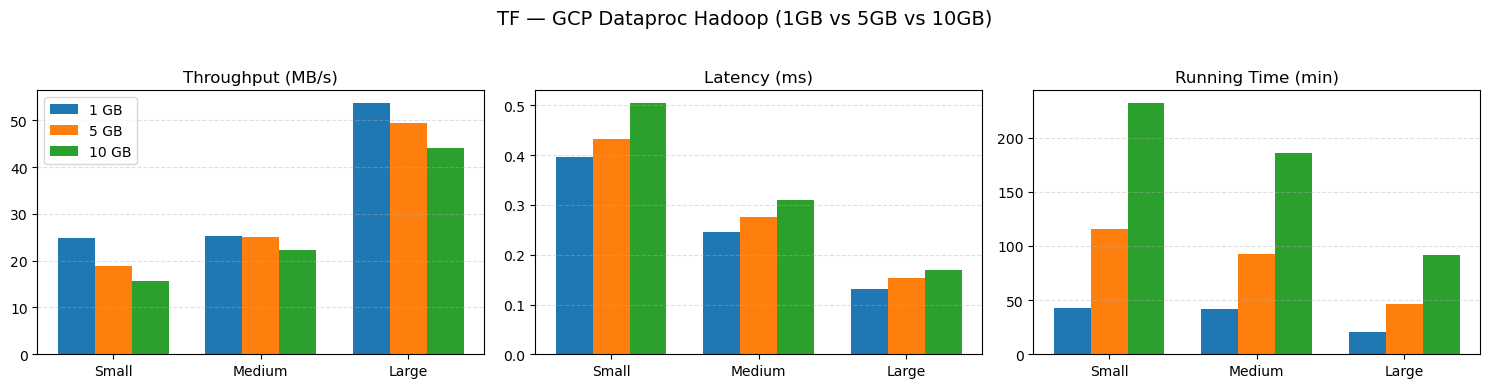

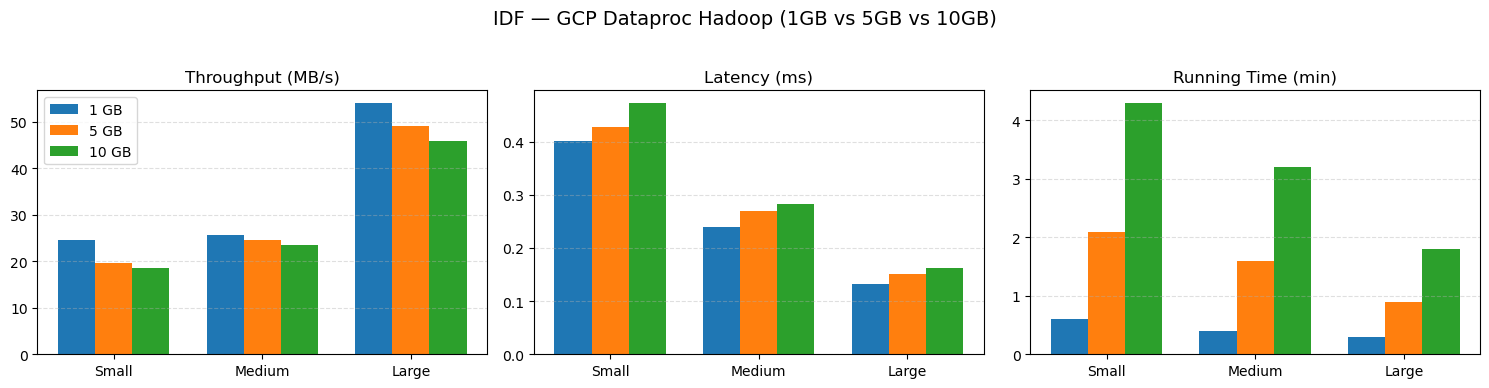

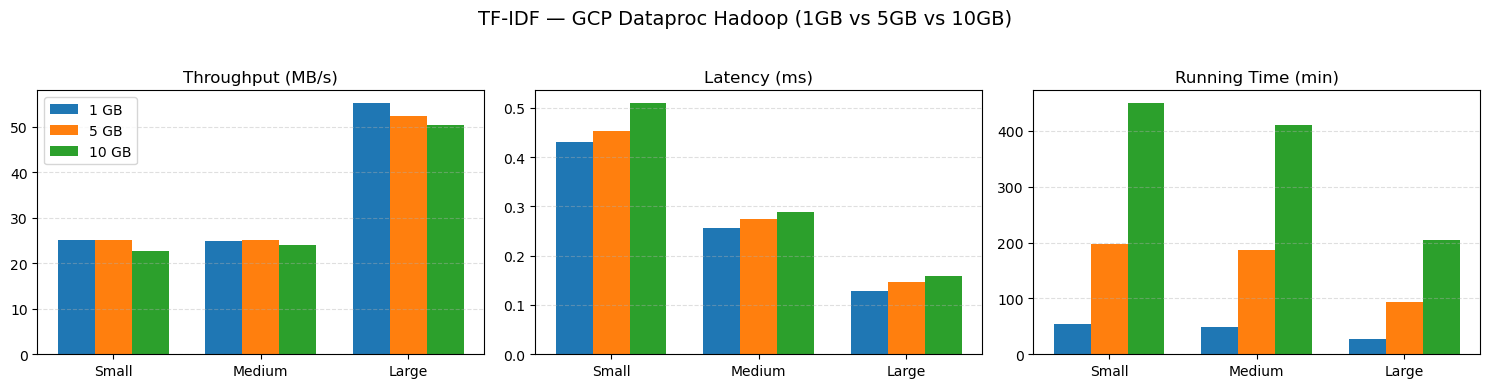

In [3]:
import matplotlib.pyplot as plt
import numpy as np

configs = ["Small", "Medium", "Large"]

# =======================
# Updated Dataset (1GB + 5GB + 10GB)
# =======================

data = {
    "TF": {
        "Throughput (MB/s)": {
            "1GB": [24.9, 25.2, 53.7],
            "5GB": [18.8, 25.1, 49.3],
            "10GB": [15.6, 22.3, 44.1],
        },
        "Latency (ms)": {
            "1GB": [0.396, 0.246, 0.131],
            "5GB": [0.432, 0.276, 0.153],
            "10GB": [0.505, 0.310, 0.170],
        },
        "Running Time (min)": {
            "1GB": [43, 42, 21],
            "5GB": [116, 93, 46],
            "10GB": [232,186,92],
        },
    },

    "IDF": {
        "Throughput (MB/s)": {
            "1GB": [24.5, 25.6, 54.1],
            "5GB": [19.7, 24.6, 49.2],
            "10GB": [18.5, 23.5, 46.0],
        },
        "Latency (ms)": {
            "1GB": [0.401, 0.239, 0.132],
            "5GB": [0.427, 0.269, 0.151],
            "10GB": [0.473, 0.282, 0.162],
        },
        "Running Time (min)": {
            "1GB": [0.6, 0.4, 0.3],
            "5GB": [2.1, 1.6, 0.9],
            "10GB": [4.3, 3.2, 1.8],
        },
    },

    "TF-IDF": {
        "Throughput (MB/s)": {
            "1GB": [25.1, 24.9, 55.2],
            "5GB": [25.0, 25.2, 52.4],
            "10GB": [22.6, 23.9, 50.3],
        },
        "Latency (ms)": {
            "1GB": [0.430, 0.257, 0.128],
            "5GB": [0.454, 0.275, 0.147],
            "10GB": [0.510, 0.289, 0.158],
        },
        "Running Time (min)": {
            "1GB": [54, 49, 27],
            "5GB": [197,186,94],
            "10GB": [450,410,205],
        },
    }
}




def plot_job(job_name, job_data):
    metrics = list(job_data.keys())
    x = np.arange(len(configs))   
    bar_width = 0.25                # Three bars → smaller width

    fig, axes = plt.subplots(1, 3, figsize=(15,4), sharex=True)
    fig.suptitle(f"{job_name} — GCP Dataproc Hadoop (1GB vs 5GB vs 10GB)", fontsize=14)

    for ax, metric in zip(axes, metrics):
        vals_1 = job_data[metric]["1GB"]
        vals_5 = job_data[metric]["5GB"]
        vals_10 = job_data[metric]["10GB"]

        ax.bar(x - bar_width, vals_1, width=bar_width, label="1 GB")
        ax.bar(x,             vals_5, width=bar_width, label="5 GB")
        ax.bar(x + bar_width, vals_10, width=bar_width, label="10 GB")

        ax.set_title(metric)
        ax.set_xticks(x)
        ax.set_xticklabels(configs)
        ax.grid(axis="y", linestyle="--", alpha=0.4)

        if metric == "Throughput (MB/s)":
            ax.legend()

    fig.tight_layout(rect=[0,0.02,1,0.95])
    plt.savefig(f"metricplot_1_5_10GB.png", dpi=300, bbox_inches='tight')
    print(f"Saved: metricplot_1_5_10GB.png")



if __name__ == "__main__":
    for job_name, job_data in data.items():
        plot_job(job_name, job_data)